In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

#EDA

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [5]:
test.info()
# train data에서 quality가 빠져있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [6]:
sample.info()
#index와 quality 2가지 열로 구성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   index    1000 non-null   int64
 1   quality  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [7]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [8]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [9]:
sample.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [10]:
train.describe()
# 변수 간 Scale이 다름 -> 추후 Scaling 필요
# citric acid 열에서 0 존재

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [11]:
train_nulltest = train[train['citric acid'] == 0]
train_nulltest
# 시트르산의 값이 0인 항이 존재하지만 특정 와인이나 와이너리의 생산 방법에 따라 시트르산 함량이 매우 낮거나 감지할 수 없을 수도 있기에 결측치가 아닌 것으로 판단

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
28,28,6,6.1,0.410,0.0,1.6,0.063,36.0,87.0,0.99140,3.27,0.67,10.8,white
43,43,5,7.7,0.600,0.0,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8,red
69,69,6,7.0,0.690,0.0,1.9,0.114,3.0,10.0,0.99636,3.35,0.60,9.7,red
98,98,6,6.8,0.785,0.0,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7,red
135,135,6,6.6,0.500,0.0,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5068,5068,5,7.4,0.660,0.0,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,red
5325,5325,5,7.4,0.700,0.0,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red
5407,5407,5,4.8,0.330,0.0,6.5,0.028,34.0,163.0,0.99370,3.35,0.61,9.9,white
5411,5411,6,6.5,0.610,0.0,2.2,0.095,48.0,59.0,0.99541,3.61,0.70,11.5,red


<ipython-input-12-470cb5c1fa6d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.iloc[:,i])
<ipython-input-12-470cb5c1fa6d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.iloc[:,i])
<ipython-input-12-470cb5c1fa6d>:6: UserWarning: 

`distplot` is a deprecated function and will be re

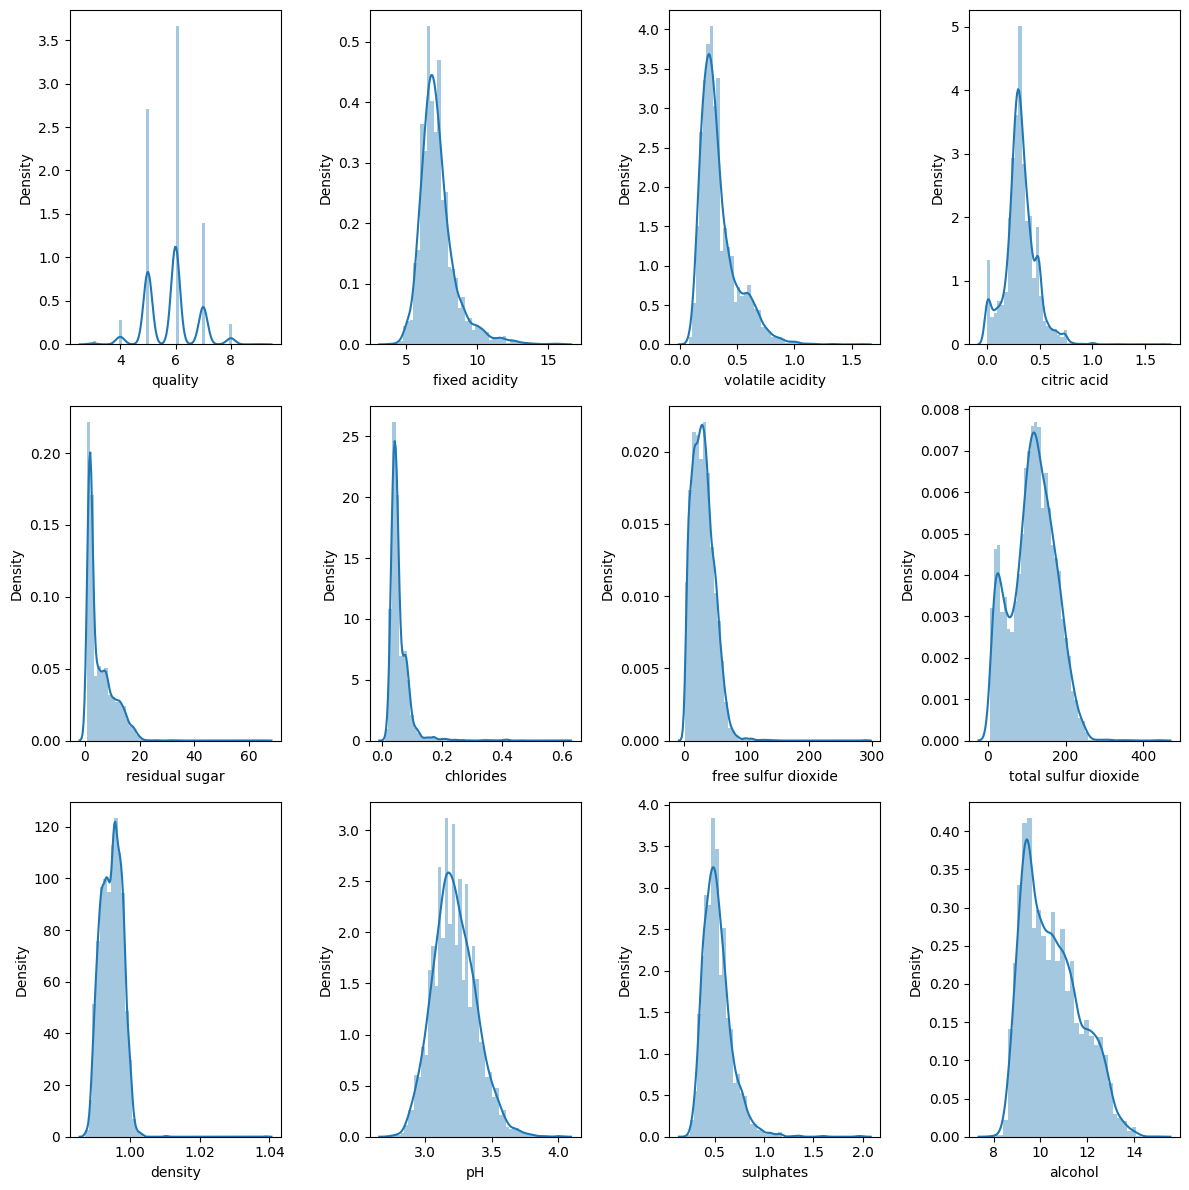

In [12]:
# train의 각 변수별 분포 확인
# 여러 변수에서 극단치 확인 -> 전처리 필요
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

In [13]:
# 결측치 확인
# Null은 없는 것으로 확인
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


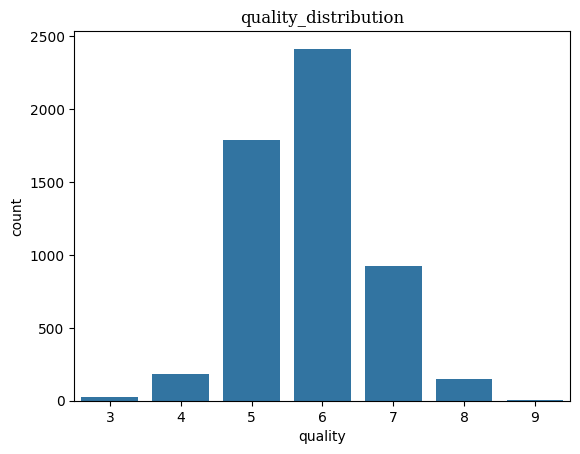

In [14]:
# 종속변수 quality의 분포 확인[3~9]
# 5,6번이 가장 빈번히 나타남 확인
print(train['quality'].value_counts())
sns.countplot(x=train['quality']);
plt.title("quality_distribution", fontfamily='serif',fontsize=12);

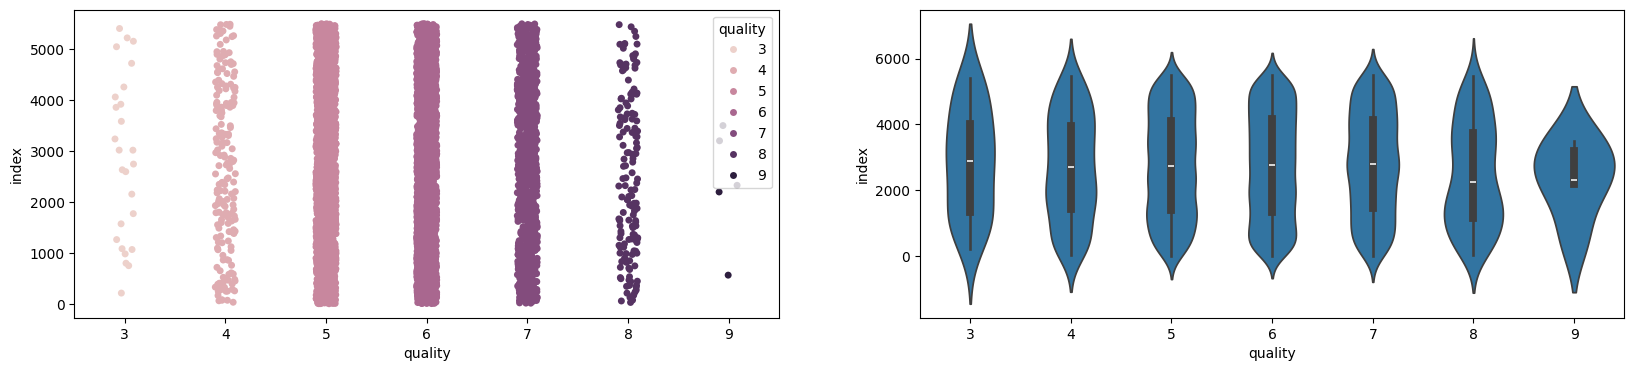

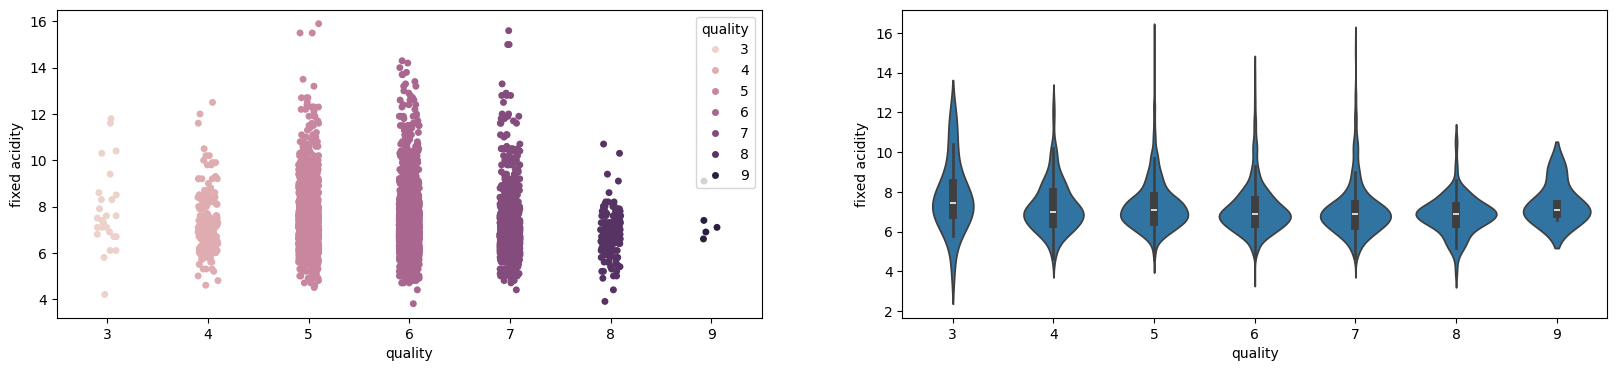

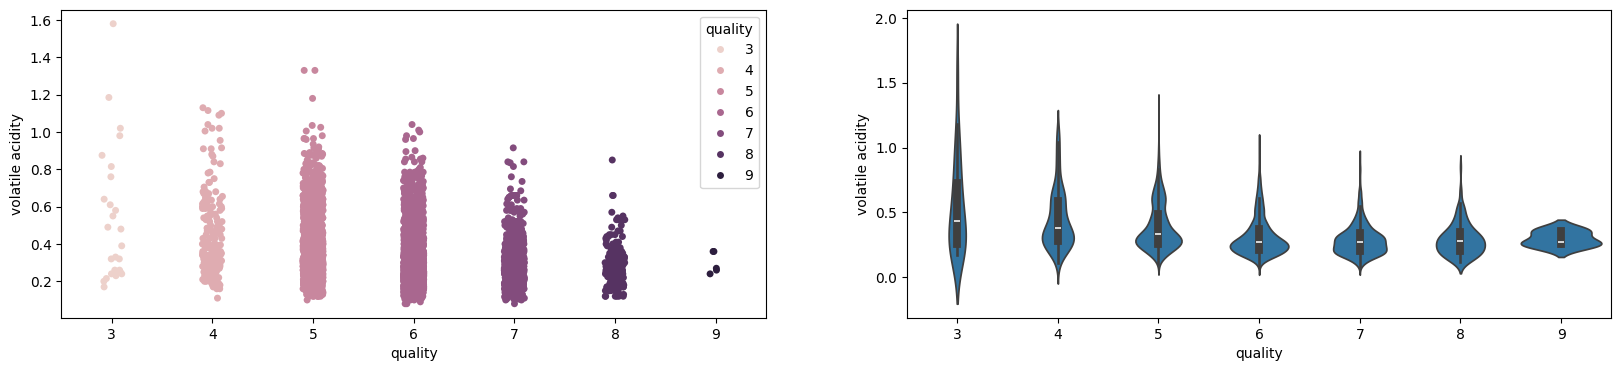

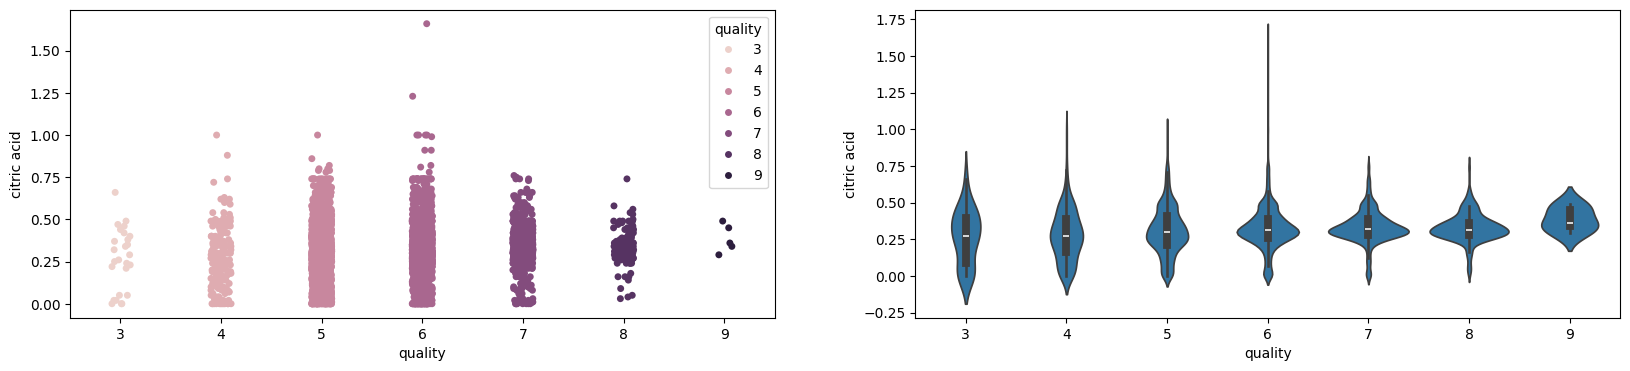

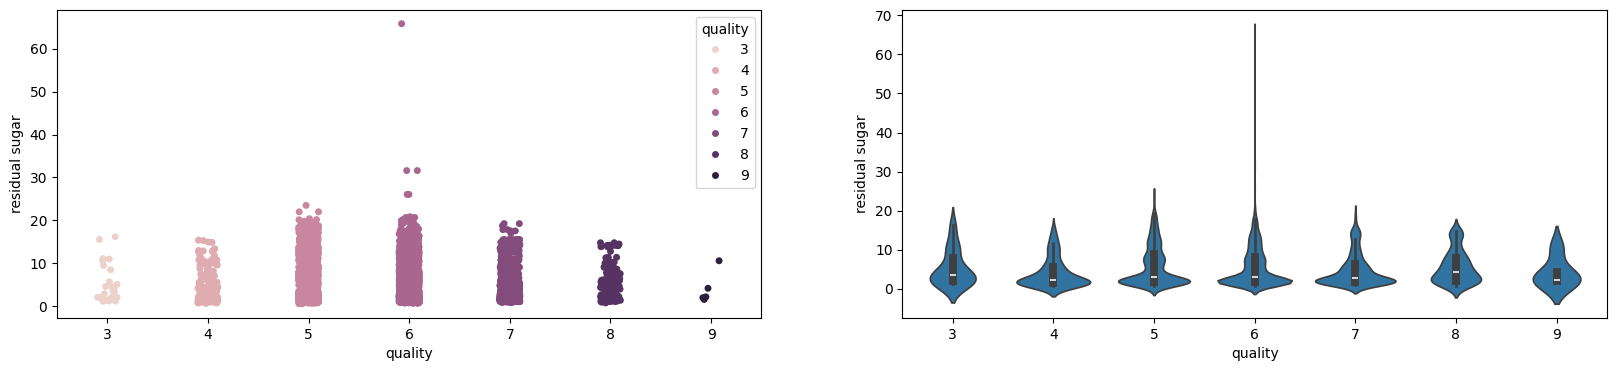

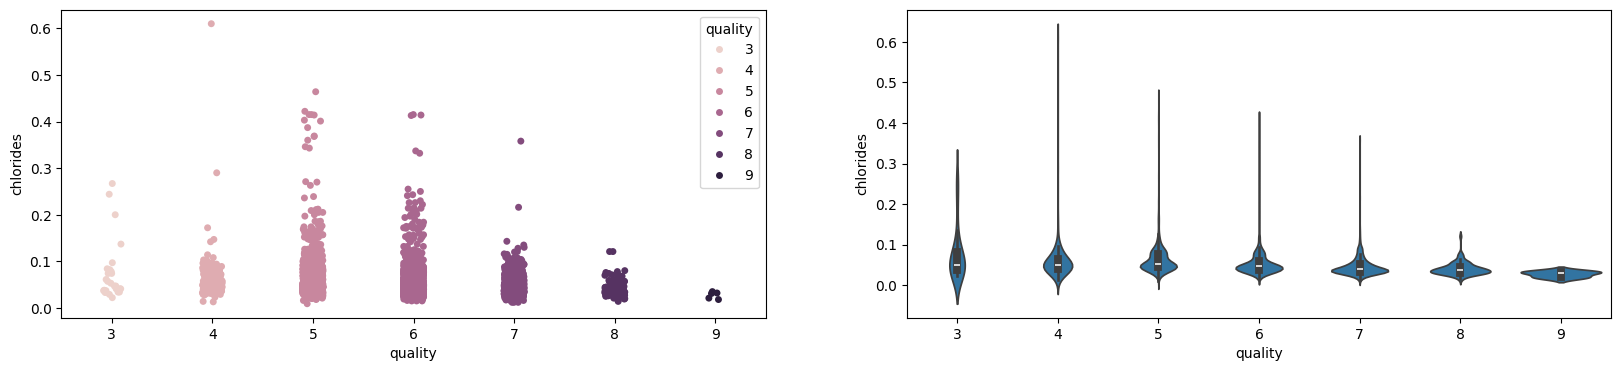

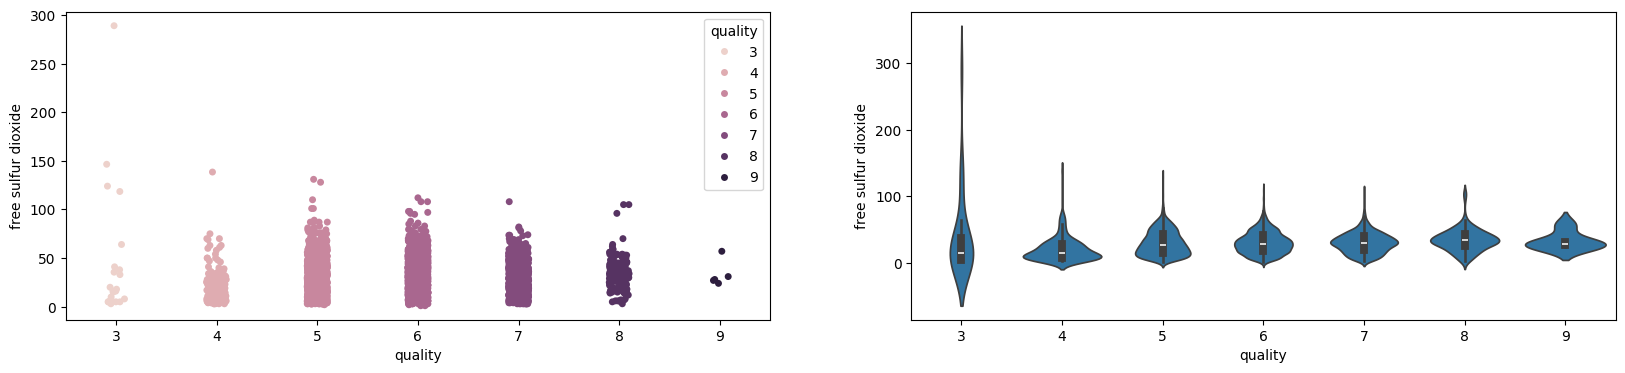

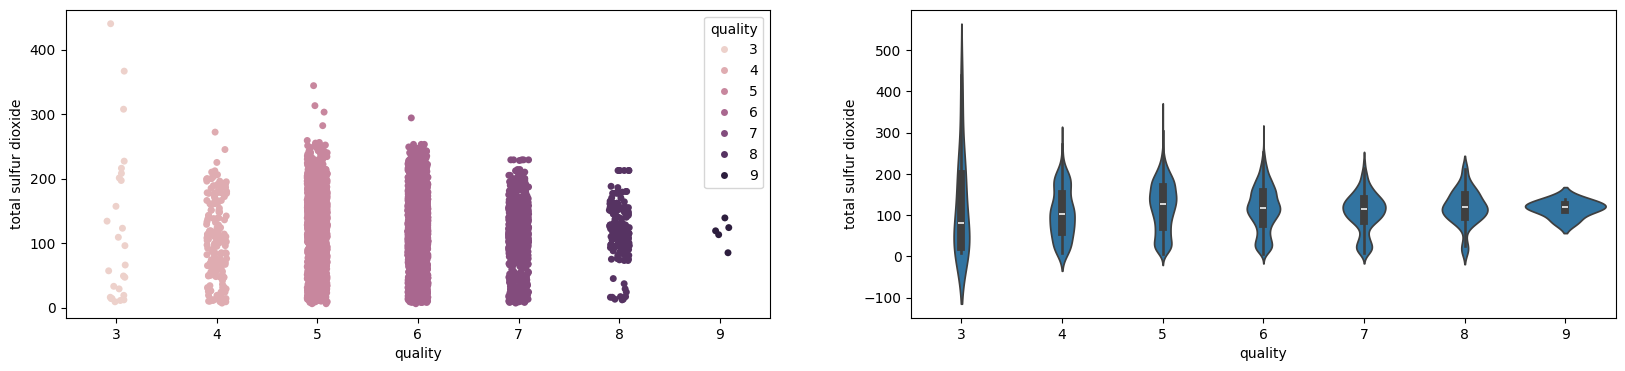

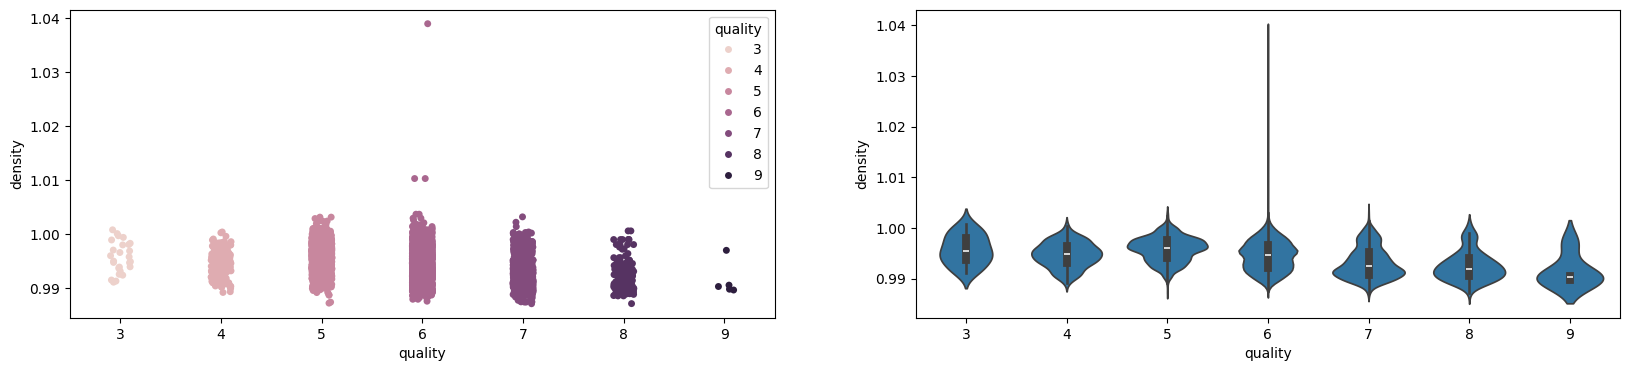

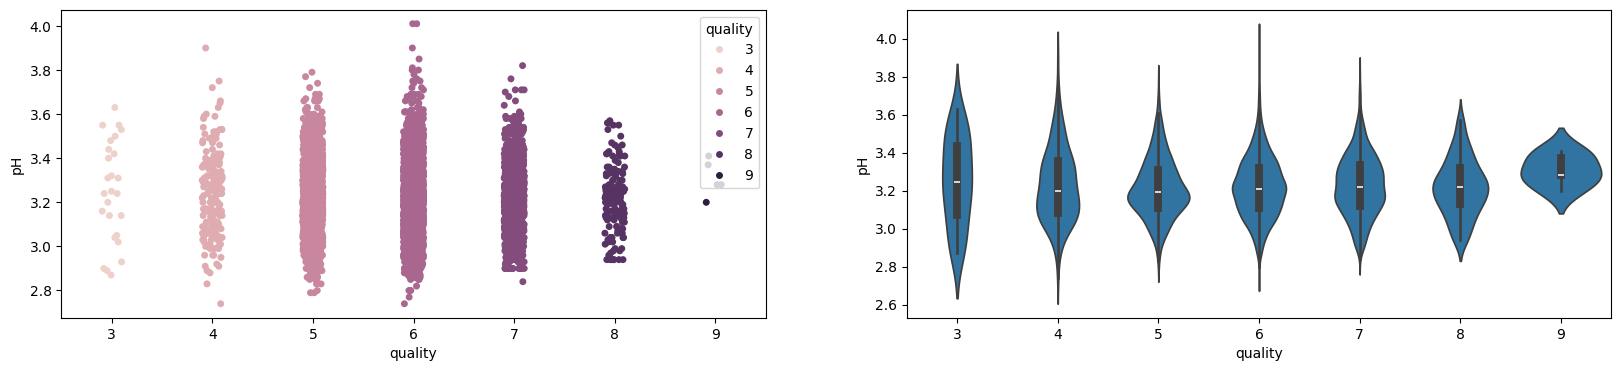

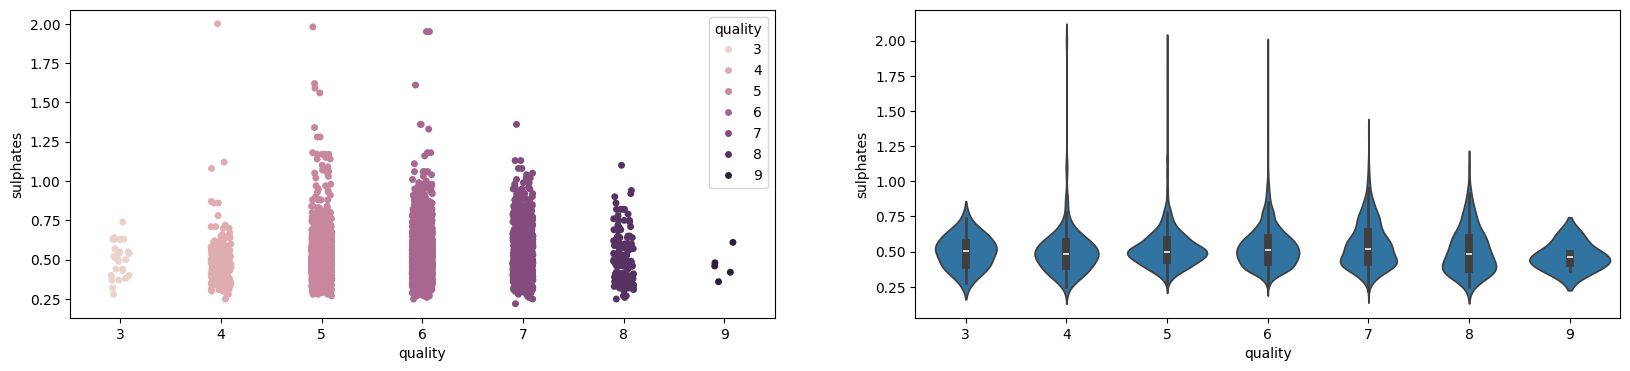

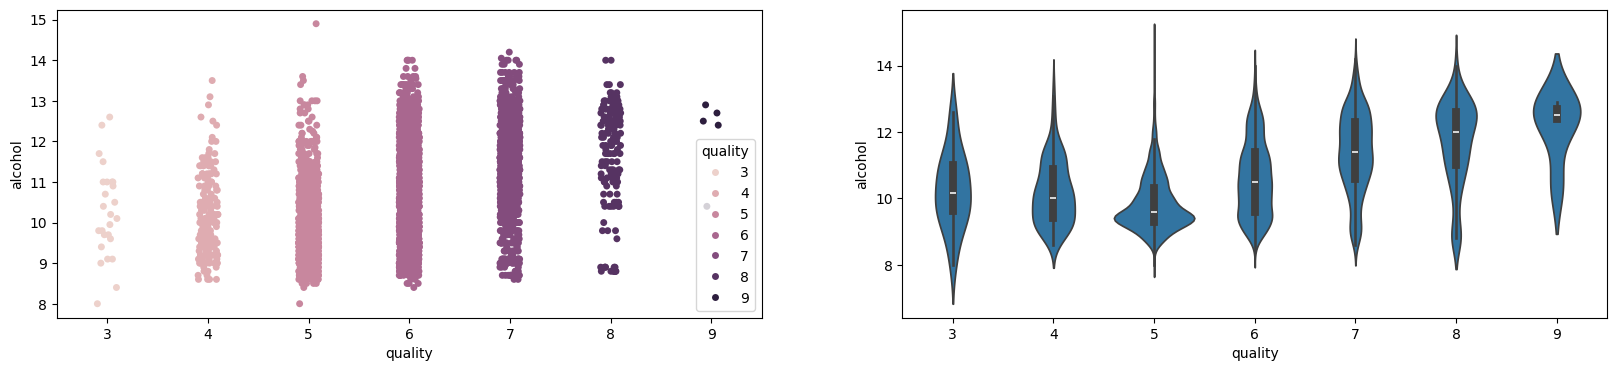

In [15]:
# 각 변수에 대해 quality를 기준으로 분포 확인
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')
def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(20,4))
        sns.stripplot(x=df['quality'],y=df[column], ax=ax[0],hue=df['quality'])
        sns.violinplot(data=df, x='quality', y=column, ax=ax[1])

show_dist_plot(train, numerical_columns)

<ipython-input-16-a26352aaa1a8>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= train.corr()


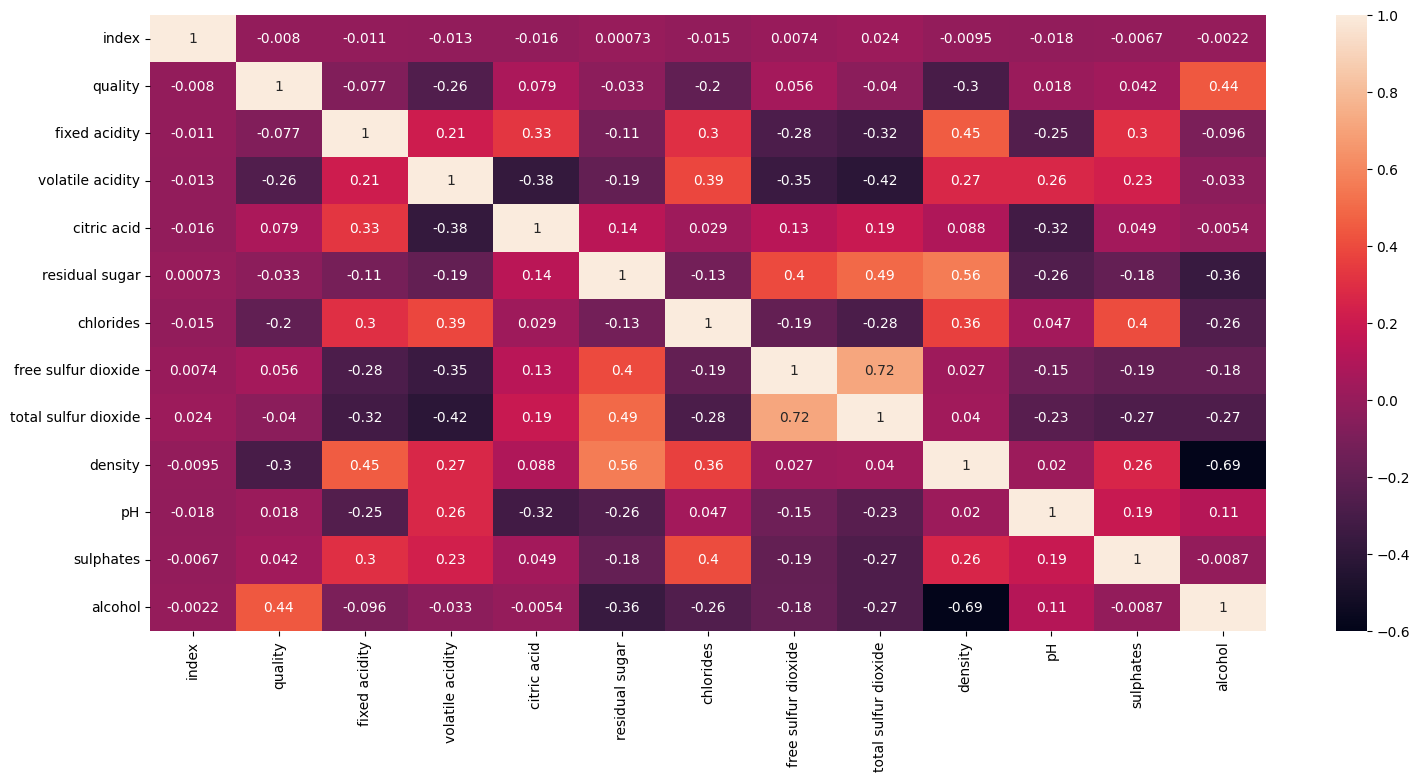

In [16]:
# Correlation Matrix
# 변수 간 상관관계 파악
# 피어슨 상관계수 값이 높은 변수들이 확인됨
# 다시 말해 다중공산성 확인이 필요

plt.figure(figsize=(18,8))
corr= train.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0);

In [17]:
# 'quality' 열과 상관관계가 0.5 이상인 열만 필터링하여 출력 -> alcohol
# 예상보다 quality와 상관성이 높은 변수가 적음

high_corr_columns = corr[abs(corr['quality']) >= 0.3].index
print("Quality 열과 상관관계가 0.5 이상인 열:")
print(high_corr_columns)

Quality 열과 상관관계가 0.5 이상인 열:
Index(['quality', 'alcohol'], dtype='object')


In [18]:
# 피어슨 상관계수 값이 높은 변수들이 확인됨
import scipy.stats as st
print("Pearson correlation coefficient:", st.pearsonr(train["alcohol"],train["density"]))
print("Pearson correlation coefficient:", st.pearsonr(train["free sulfur dioxide"],train["total sulfur dioxide"]))
print("Pearson correlation coefficient:", st.pearsonr(train["fixed acidity"],train["density"]))

Pearson correlation coefficient: PearsonRResult(statistic=-0.6880527353336939, pvalue=0.0)
Pearson correlation coefficient: PearsonRResult(statistic=0.7168286641147574, pvalue=0.0)
Pearson correlation coefficient: PearsonRResult(statistic=0.45216149344849726, pvalue=2.885448115150152e-275)


In [19]:
# 독립변수의 다중공선성 VIF로 확인
# density, pH, fixed acidity, alcohol 등에서 다중공선성이 높게 나타남
# 다중공선성의 영향을 덜 받는 모델을 사용해야겠다
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train.select_dtypes(include=[np.number])
X.drop(['quality'], axis=1, inplace=True)
# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                Variable         VIF
0                  index    4.006863
1          fixed acidity   59.135549
2       volatile acidity    9.030695
3            citric acid    9.265266
4         residual sugar    3.562763
5              chlorides    5.712796
6    free sulfur dioxide    8.342568
7   total sulfur dioxide   14.695795
8                density  938.882040
9                     pH  582.937363
10             sulphates   18.277053
11               alcohol  108.031563


# 전처리

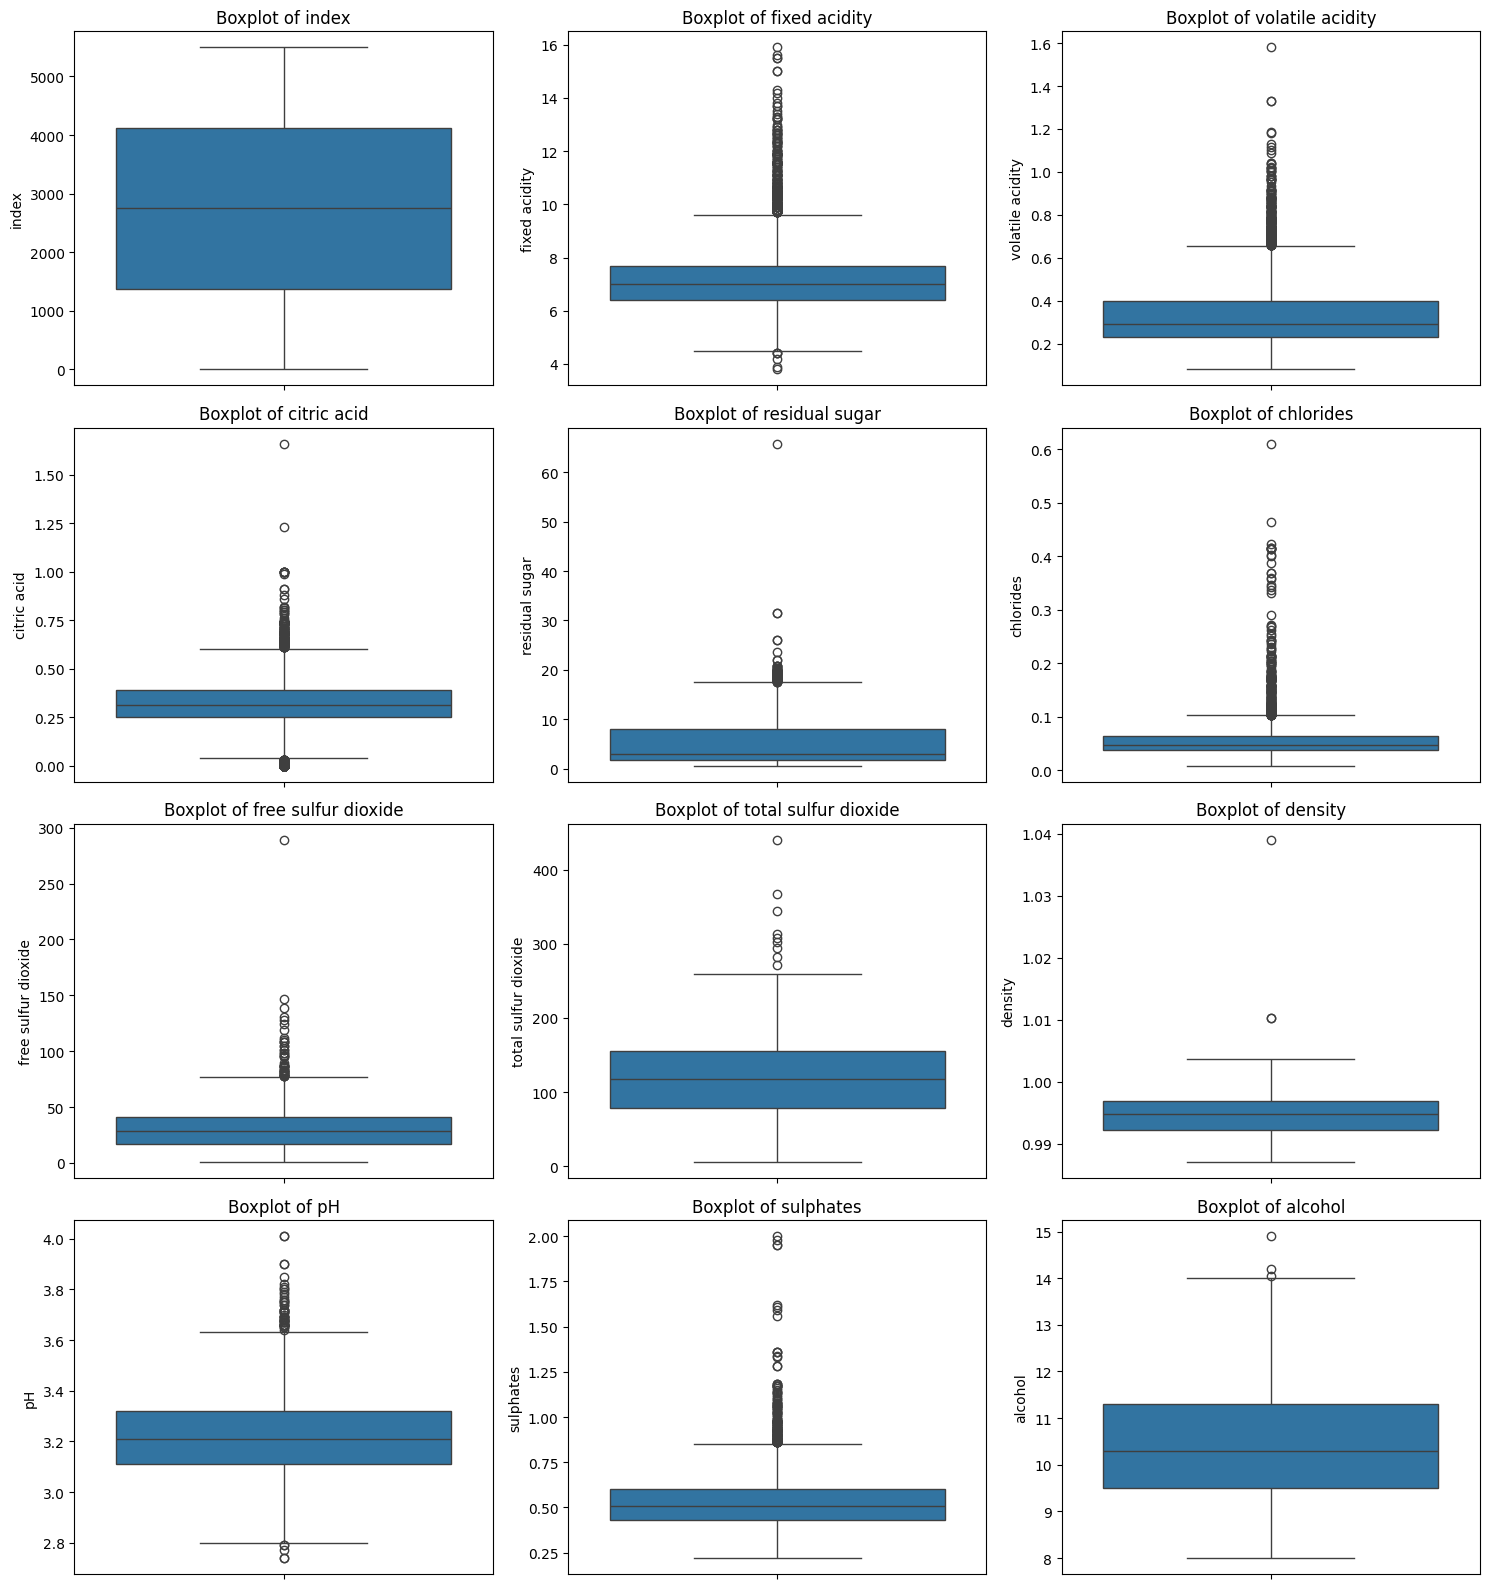

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# EDA에서 확인한 극단치에 대해 세부적으로 알아보자
# train 데이터프레임의 모든 수치형 변수에 대한 박스 플롯

# 수치형 변수 선택
numeric_columns = train.drop(columns = ['quality']).select_dtypes(include=['float64', 'int64']).columns
n_numeric_columns = len(numeric_columns)

# 그리드 크기 설정
n_cols = 3  # 한 줄에 표시할 그래프의 수
n_rows = (n_numeric_columns + n_cols - 1) // n_cols  # 필요한 줄 수 계산

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # 전체 그림 크기 설정

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # 서브플롯 위치 설정
    sns.boxplot(y=train[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # 그래프 간격 자동 조정
plt.show()


In [21]:
# index 변수 제거
train.drop(columns = ['index'], inplace = True)

In [22]:
train

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [23]:
# type 라벨 인코딩
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

train['type'] = label_encoder.fit_transform(train['type'])

train



,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 558.4 KB


In [25]:
train['type'].value_counts()

1    4159
0    1338
Name: type, dtype: int64

#1. 1.5IQR 밖의 범위 이상치 제거


In [26]:
# 1.5 IQR 범위 밖의 값 이상치 제거
df = train.copy()

In [27]:
import pandas as pd

# 데이터 프레임의 열: 'density', 'alcohol', 'quality' 제외한 모든 열에서 1.5IQR 밖의 값을 제거
columns_to_exclude = ['density', 'alcohol', 'quality','type']
for column in df.columns:
    if column not in columns_to_exclude:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 범위 밖의 값들을 제거
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound) | df[column].isnull()]

# 결과 데이터 프레임 출력
print(df)


      quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
1           5            8.8              0.61         0.14             2.4   
2           5            7.9              0.21         0.39             2.0   
3           6            7.0              0.21         0.31             6.0   
4           6            7.8              0.40         0.26             9.5   
5           6            6.0              0.19         0.37             9.7   
...       ...            ...               ...          ...             ...   
5492        5            7.7              0.15         0.29             1.3   
5493        6            6.3              0.18         0.36             1.2   
5494        7            7.8              0.15         0.34             1.1   
5495        5            6.6              0.41         0.31             1.6   
5496        6            7.0              0.35         0.17             1.1   

      chlorides  free sulfur dioxide  total sulfur 

In [28]:
df['type'].value_counts()

1    3610
0     310
Name: type, dtype: int64

In [29]:
X = df.drop(columns = ['quality'])

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 1 to 5496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3920 non-null   float64
 1   volatile acidity      3920 non-null   float64
 2   citric acid           3920 non-null   float64
 3   residual sugar        3920 non-null   float64
 4   chlorides             3920 non-null   float64
 5   free sulfur dioxide   3920 non-null   float64
 6   total sulfur dioxide  3920 non-null   float64
 7   density               3920 non-null   float64
 8   pH                    3920 non-null   float64
 9   sulphates             3920 non-null   float64
 10  alcohol               3920 non-null   float64
 11  type                  3920 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 398.1 KB


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 데이터프레임의 모든 특성에 대해 Min-Max Scaling을 수행합니다.
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.836735,0.938053,0.106383,0.098093,0.805556,0.105263,0.145749,0.665534,0.468354,0.649123,0.189655,0.0
1,0.653061,0.230088,0.638298,0.076294,0.666667,0.250000,0.534413,0.316111,0.291139,0.526316,0.431034,1.0
2,0.469388,0.230088,0.468085,0.294278,0.513889,0.355263,0.412955,0.461591,0.556962,0.491228,0.413793,1.0
3,0.632653,0.566372,0.361702,0.485014,0.694444,0.394737,0.696356,0.570360,0.278481,0.368421,0.431034,1.0
4,0.265306,0.194690,0.595745,0.495913,0.319444,0.197368,0.178138,0.414004,0.329114,0.771930,0.620690,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3915,0.612245,0.123894,0.425532,0.038147,0.277778,0.105263,0.234818,0.414004,0.670886,0.298246,0.293103,1.0
3916,0.326531,0.176991,0.574468,0.032698,0.347222,0.315789,0.425101,0.246771,0.430380,0.508772,0.448276,1.0
3917,0.632653,0.123894,0.531915,0.027248,0.361111,0.381579,0.352227,0.261727,0.316456,0.877193,0.500000,1.0
3918,0.387755,0.584071,0.468085,0.054496,0.458333,0.210526,0.384615,0.329028,0.392405,0.333333,0.362069,1.0


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3920 non-null   float64
 1   volatile acidity      3920 non-null   float64
 2   citric acid           3920 non-null   float64
 3   residual sugar        3920 non-null   float64
 4   chlorides             3920 non-null   float64
 5   free sulfur dioxide   3920 non-null   float64
 6   total sulfur dioxide  3920 non-null   float64
 7   density               3920 non-null   float64
 8   pH                    3920 non-null   float64
 9   sulphates             3920 non-null   float64
 10  alcohol               3920 non-null   float64
 11  type                  3920 non-null   float64
dtypes: float64(12)
memory usage: 367.6 KB


In [33]:
y = df.quality

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [35]:
X_train.shape, X_test.shape


((3136, 12), (784, 12))

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Random Forest 분류기를 생성하고 훈련합니다.
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# 테스트 데이터에 대해 예측합니다.
y_pred = random_forest_classifier.predict(X_test)

# 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6747448979591837


#2. 이상치 제거하지 않고 바로 진행

In [37]:
df2 = train.copy()

In [38]:
df2

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [39]:
df2['type'].value_counts()

1    4159
0    1338
Name: type, dtype: int64

In [40]:
X = df2.drop(columns = ['quality'])

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 데이터프레임의 모든 특성에 대해 Min-Max Scaling을 수행합니다.
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,1.0
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,0.0
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,1.0
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,1.0
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.322314,0.046667,0.174699,0.010736,0.033278,0.031250,0.133641,0.117409,0.480315,0.095506,0.304348,1.0
5493,0.206612,0.066667,0.216867,0.009202,0.041597,0.086806,0.241935,0.069983,0.330709,0.162921,0.434783,1.0
5494,0.330579,0.046667,0.204819,0.007669,0.043261,0.104167,0.200461,0.074224,0.259843,0.280899,0.478261,1.0
5495,0.231405,0.220000,0.186747,0.015337,0.054908,0.059028,0.218894,0.093310,0.307087,0.106742,0.362319,1.0


In [42]:
y = df2.quality

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Random Forest 분류기를 생성하고 훈련합니다.
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=43)
random_forest_classifier.fit(X_train, y_train)

# 테스트 데이터에 대해 예측합니다.
y_pred = random_forest_classifier.predict(X_test)

# 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6754545454545454


#3. 상위 5% 해당하는 데이터 제거

In [45]:
df3 = train.copy()

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 558.4 KB


In [47]:
for column in train.columns:
    if column not in ['quality', 'type']:
        threshold = df3[column].quantile(0.95)  # 상위 5% 값의 임계값 계산
        df3 = df3[df3[column] <= threshold]  # 임계값보다 작거나 같은 값만 유지

# 결과 출력
print(df3)

      quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
1           5            8.8              0.61         0.14             2.4   
2           5            7.9              0.21         0.39             2.0   
3           6            7.0              0.21         0.31             6.0   
4           6            7.8              0.40         0.26             9.5   
5           6            6.0              0.19         0.37             9.7   
...       ...            ...               ...          ...             ...   
5492        5            7.7              0.15         0.29             1.3   
5493        6            6.3              0.18         0.36             1.2   
5494        7            7.8              0.15         0.34             1.1   
5495        5            6.6              0.41         0.31             1.6   
5496        6            7.0              0.35         0.17             1.1   

      chlorides  free sulfur dioxide  total sulfur 

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 1 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               3233 non-null   int64  
 1   fixed acidity         3233 non-null   float64
 2   volatile acidity      3233 non-null   float64
 3   citric acid           3233 non-null   float64
 4   residual sugar        3233 non-null   float64
 5   chlorides             3233 non-null   float64
 6   free sulfur dioxide   3233 non-null   float64
 7   total sulfur dioxide  3233 non-null   float64
 8   density               3233 non-null   float64
 9   pH                    3233 non-null   float64
 10  sulphates             3233 non-null   float64
 11  alcohol               3233 non-null   float64
 12  type                  3233 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 353.6 KB


In [49]:
X = df3.drop(columns = ['quality'])

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 데이터프레임의 모든 특성에 대해 Min-Max Scaling을 수행합니다.
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.814815,0.898305,0.264151,0.124138,0.696203,0.137931,0.185567,0.881981,0.592105,0.666667,0.250000,0.0
1,0.648148,0.220339,0.735849,0.096552,0.569620,0.327586,0.680412,0.340358,0.407895,0.529412,0.568182,1.0
2,0.481481,0.220339,0.584906,0.372414,0.430380,0.465517,0.525773,0.565859,0.684211,0.490196,0.545455,1.0
3,0.629630,0.542373,0.490566,0.613793,0.594937,0.517241,0.886598,0.734457,0.394737,0.352941,0.568182,1.0
4,0.296296,0.186441,0.698113,0.627586,0.253165,0.258621,0.226804,0.492097,0.447368,0.803922,0.818182,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3228,0.611111,0.118644,0.547170,0.048276,0.215190,0.137931,0.298969,0.492097,0.802632,0.274510,0.386364,1.0
3229,0.351852,0.169492,0.679245,0.041379,0.278481,0.413793,0.541237,0.232877,0.552632,0.509804,0.590909,1.0
3230,0.629630,0.118644,0.641509,0.034483,0.291139,0.500000,0.448454,0.256059,0.434211,0.921569,0.659091,1.0
3231,0.407407,0.559322,0.584906,0.068966,0.379747,0.275862,0.489691,0.360379,0.513158,0.313725,0.477273,1.0


In [51]:
y = df3.quality

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Random Forest 분류기를 생성하고 훈련합니다.
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=43)
random_forest_classifier.fit(X_train, y_train)

# 테스트 데이터에 대해 예측합니다.
y_pred = random_forest_classifier.predict(X_test)

# 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6893353941267388


#모델링: SVM


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [55]:
# SVM 분류기 생성 및 훈련
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# 예측 및 평가
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 52.70%


#모델링: GBM


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Initializing the GBM classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Training the GBM classifier
gbm_classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = gbm_classifier.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5146831530139103


#모델링: Extra Tree Classifier


In [57]:
from sklearn.ensemble import ExtraTreesClassifier


In [58]:
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees_classifier.fit(X_train, y_train)

# Predictions
predictions = extra_trees_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6800618238021638


#모델링: Adboost Classifier


In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_boost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,  # Number of weak learners to train iteratively
    learning_rate=1,  # Contribution of each classifier by learning rate
    random_state=42
)

# Train the AdaBoost classifier
ada_boost_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = ada_boost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model Accuracy: 0.4574961360123648


In [94]:
!pip install lightgbm
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.2 MB/s eta 0:00:00


#모델링: Light GBM

In [95]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already prepared
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm*100:.2f}%")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1842
[LightGBM] [Info] Number of data points in the train set: 2586, number of used features: 15
[LightGBM] [Info] Start training from score -6.759255
[LightGBM] [Info] Start training from score -3.314573
[LightGBM] [Info] Start training from score -1.227184
[LightGBM] [Info] Start training from score -0.796533
[LightGBM] [Info] Start training from score -1.675783
[LightGBM] [Info] Start training from score -3.501159
[LightGBM] [Info] Start training from score -6.759255
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

#모델링: CatBoost Classifier


In [96]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_state=42, verbose=0)  # 'verbose=0' to silence the output
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost*100:.2f}%")


CatBoost Accuracy: 64.91%


#Standard Scaling 시도

In [60]:
df4 = train.copy()

In [78]:
for column in train.columns:
    if column not in ['quality', 'type']:
        threshold = df4[column].quantile(0.95)  # 상위 5% 값의 임계값 계산
        df4 = df4[df4[column] <= threshold]  # 임계값보다 작거나 같은 값만 유지

# 결과 출력
print(df4)

      quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
1           5            8.8              0.61         0.14             2.4   
2           5            7.9              0.21         0.39             2.0   
3           6            7.0              0.21         0.31             6.0   
4           6            7.8              0.40         0.26             9.5   
5           6            6.0              0.19         0.37             9.7   
...       ...            ...               ...          ...             ...   
5492        5            7.7              0.15         0.29             1.3   
5493        6            6.3              0.18         0.36             1.2   
5494        7            7.8              0.15         0.34             1.1   
5495        5            6.6              0.41         0.31             1.6   
5496        6            7.0              0.35         0.17             1.1   

      chlorides  free sulfur dioxide  total sulfur 

In [79]:
X = df4.drop(columns = ['quality'])

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 데이터프레임의 모든 특성에 대해 Min-Max Scaling을 수행합니다.
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,2.110036,2.572106,-1.515994,-0.595822,1.364846,-1.388068,-1.659497,1.441688,-0.115522,0.925100,-1.105784,-2.483649
1,1.080571,-0.752496,0.829082,-0.705482,0.713826,-0.583644,0.518555,-0.770874,-1.116625,0.266592,0.205400,0.402633
2,0.051107,-0.752496,0.078658,0.391121,-0.002296,0.001391,-0.162087,0.150309,0.385029,0.078447,0.111744,0.402633
3,0.966186,0.826690,-0.390358,1.350648,0.844030,0.220779,1.426076,0.839044,-1.188132,-0.580060,0.205400,0.402633
4,-1.092742,-0.918726,0.641476,1.405479,-0.913723,-0.876162,-1.477993,-0.151012,-0.902103,1.583607,1.235616,0.402633
...,...,...,...,...,...,...,...,...,...,...,...,...
3228,0.851802,-1.251186,-0.108948,-0.897388,-1.109029,-1.388068,-1.160360,-0.151012,1.028595,-0.956350,-0.543848,0.402633
3229,-0.749587,-1.001841,0.547673,-0.924803,-0.783519,-0.217997,-0.094022,-1.209942,-0.330044,0.172520,0.299056,0.402633
3230,0.966186,-1.251186,0.360067,-0.952218,-0.718417,0.147650,-0.502407,-1.115241,-0.973610,2.148042,0.580024,0.402633
3231,-0.406433,0.909805,0.078658,-0.815143,-0.262703,-0.803032,-0.320903,-0.689087,-0.544566,-0.768205,-0.169224,0.402633


In [81]:
y = df4.quality

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Random Forest 분류기를 생성하고 훈련합니다.
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# 테스트 데이터에 대해 예측합니다.
y_pred = random_forest_classifier.predict(X_test)

# 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6893353941267388


In [84]:
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
extra_trees_classifier.fit(X_train, y_train)

# Predictions
predictions = extra_trees_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6800618238021638


In [85]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


In [87]:
# type 라벨 인코딩
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

test['type'] = label_encoder.fit_transform(test['type'])

test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,0
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,1
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,0
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,0


In [88]:
y_pred = extra_trees_classifier.predict(test)


In [89]:
sample['quality'] = y_pred


In [90]:
sample

,index,quality
0,0,6
1,1,6
2,2,6
3,3,6
4,4,6
...,...,...
995,995,6
996,996,6
997,997,6
998,998,6


#Hyperparameter Tuning

In [91]:
sample.to_csv('sample.csv', index=False)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
improved_accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print(f"Improved Accuracy: {improved_accuracy*100:.2f}%")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Improved Accuracy: 67.23%


#Feature Engineering

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

data = df4.copy()


data['acid_sugar_ratio'] = data['fixed acidity'] / (data['residual sugar'] + 1)
data['free_to_total_sulfur_ratio'] = data['free sulfur dioxide'] / (data['total sulfur dioxide'] + 1)
data['alcohol_to_density_ratio'] = data['alcohol'] / data['density']

label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

X = data.drop(['quality'], axis=1)
y = data['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

selector = SelectFromModel(rf, prefit=True)
X_important_train = selector.transform(X_train)
X_important_test = selector.transform(X_test)

rf_important = RandomForestClassifier(n_estimators=100, random_state=42)
rf_important.fit(X_important_train, y_train)

y_pred_important = rf_important.predict(X_important_test)
important_features_accuracy = accuracy_score(y_test, y_pred_important)

print(f"Accuracy with Important Features: {important_features_accuracy*100:.2f}%")


Accuracy with Important Features: 64.14%
